# PROJECT 1 - MAY/2023 - MANUFACTURING DATA

In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
##Importing data from the given .CSV file

In [3]:
data = pd.read_csv('HourlyData.csv')
data.head()

,Cooling efficiency,Cooling power,Motor power W,Volume flow l/min 1,Volume flow l/min 2,Pressure bar 1,Pressure bar 2,Pressure bar 3,Pressure bar 4,Pressure bar 5,Pressure bar 6,Efficiency factor,Temperature 1,Temperature 2,Temperature 3,Temperature 4,Vibration mm/s,Date
0,47.202,2.184,2411.6,8.990,10.179,151.47,125.50,2.305,0.0,9.936,9.818,68.039,35.570,40.961,38.320,30.363,0.604,4/26/18 0:00
1,29.208,1.414,2409.6,8.919,10.408,151.11,125.06,2.281,0.0,9.700,9.592,68.264,36.156,41.258,38.680,33.648,0.590,4/26/18 1:00
2,23.554,1.159,2397.8,9.179,10.392,150.81,125.13,2.227,0.0,9.606,9.505,68.595,37.488,42.129,39.234,35.113,0.578,4/26/18 2:00
3,21.540,1.101,2383.8,9.034,10.329,150.48,124.93,2.320,0.0,9.528,9.422,68.628,38.633,43.039,40.086,36.133,0.565,4/26/18 3:00
4,20.460,1.086,2372.0,8.729,10.276,150.41,124.72,2.250,0.0,9.408,9.315,68.868,39.461,44.031,40.934,36.992,0.570,4/26/18 4:00


In [4]:
#How big our data is:
data.shape

(2205, 18)

In [5]:
#Summary statistics
data.describe()

,Cooling efficiency,Cooling power,Motor power W,Volume flow l/min 1,Volume flow l/min 2,Pressure bar 1,Pressure bar 2,Pressure bar 3,Pressure bar 4,Pressure bar 5,Pressure bar 6,Efficiency factor,Temperature 1,Temperature 2,Temperature 3,Temperature 4,Vibration mm/s
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,31.325613,1.808180,2341.493968,8.287100,9.651824,148.978467,123.362422,2.109728,2.585712,9.167484,9.083592,67.071473,45.511420,50.456266,47.635995,40.712106,0.603251
std,11.532175,0.272483,76.469325,0.480969,0.449138,3.684421,3.701729,0.192998,4.299882,0.576749,0.550135,4.645096,8.025131,7.445679,7.481373,8.108900,0.052399
min,17.356000,1.083000,2227.800000,7.033000,8.816000,144.920000,119.610000,0.492000,0.000000,8.342000,8.304000,10.784000,35.398000,40.840000,38.176000,30.355000,0.519000
25%,20.165000,1.558000,2273.800000,7.961000,9.210000,147.060000,121.630000,2.000000,0.000000,8.559000,8.498000,65.751000,36.312000,41.914000,39.086000,31.254000,0.561000
50%,27.334000,1.736000,2333.800000,8.278000,9.691000,148.560000,123.040000,2.086000,0.000000,9.114000,9.029000,67.958000,44.863000,49.832000,47.012000,40.410000,0.601000
75%,46.651000,2.138000,2413.600000,8.610000,10.154000,150.980000,125.100000,2.250000,3.757000,9.850000,9.733000,68.990000,54.238000,58.707000,55.660000,49.340000,0.625000
max,48.136000,2.839000,2863.200000,11.754000,10.408000,188.800000,165.480000,2.555000,10.245000,10.010000,9.887000,70.480000,58.039000,62.094000,59.484000,53.043000,1.037000


In [6]:
#Checking the type of data we have here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cooling efficiency   2205 non-null   float64
 1   Cooling power        2205 non-null   float64
 2   Motor power W        2205 non-null   float64
 3   Volume flow l/min 1  2205 non-null   float64
 4   Volume flow l/min 2  2205 non-null   float64
 5   Pressure bar 1       2205 non-null   float64
 6   Pressure bar 2       2205 non-null   float64
 7   Pressure bar 3       2205 non-null   float64
 8   Pressure bar 4       2205 non-null   float64
 9   Pressure bar 5       2205 non-null   float64
 10  Pressure bar 6       2205 non-null   float64
 11  Efficiency factor    2205 non-null   float64
 12  Temperature 1        2205 non-null   float64
 13  Temperature  2       2205 non-null   float64
 14  Temperature  3       2205 non-null   float64
 15  Temperature  4       2205 non-null   f

In [7]:
#Just to verify there is no null value
#Do we have any null value?
data.isna()

,Cooling efficiency,Cooling power,Motor power W,Volume flow l/min 1,Volume flow l/min 2,Pressure bar 1,Pressure bar 2,Pressure bar 3,Pressure bar 4,Pressure bar 5,Pressure bar 6,Efficiency factor,Temperature 1,Temperature 2,Temperature 3,Temperature 4,Vibration mm/s,Date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#Splliting up the date and time on the last column
data['Dates'] = pd.to_datetime(data['Date']).dt.date
data['Time'] = pd.to_datetime(data['Date']).dt.time

In [9]:
data.head()

,Cooling efficiency,Cooling power,Motor power W,Volume flow l/min 1,Volume flow l/min 2,Pressure bar 1,Pressure bar 2,Pressure bar 3,Pressure bar 4,Pressure bar 5,Pressure bar 6,Efficiency factor,Temperature 1,Temperature 2,Temperature 3,Temperature 4,Vibration mm/s,Date,Dates,Time
0,47.202,2.184,2411.6,8.990,10.179,151.47,125.50,2.305,0.0,9.936,9.818,68.039,35.570,40.961,38.320,30.363,0.604,4/26/18 0:00,2018-04-26,00:00:00
1,29.208,1.414,2409.6,8.919,10.408,151.11,125.06,2.281,0.0,9.700,9.592,68.264,36.156,41.258,38.680,33.648,0.590,4/26/18 1:00,2018-04-26,01:00:00
2,23.554,1.159,2397.8,9.179,10.392,150.81,125.13,2.227,0.0,9.606,9.505,68.595,37.488,42.129,39.234,35.113,0.578,4/26/18 2:00,2018-04-26,02:00:00
3,21.540,1.101,2383.8,9.034,10.329,150.48,124.93,2.320,0.0,9.528,9.422,68.628,38.633,43.039,40.086,36.133,0.565,4/26/18 3:00,2018-04-26,03:00:00
4,20.460,1.086,2372.0,8.729,10.276,150.41,124.72,2.250,0.0,9.408,9.315,68.868,39.461,44.031,40.934,36.992,0.570,4/26/18 4:00,2018-04-26,04:00:00


In [10]:
#Renaming Vol flow 1 and 2
data.rename(columns = {'Volume flow l/min 1':'Vol_1', 'Volume flow l/min 2':'Vol_2'}, inplace = True)
print(data.columns)

#Renaming Temperatures, they have an extra space on the label
data.rename(columns = {'Temperature 1':'Temp_1', 'Temperature  2':'Temp_2', 'Temperature  3':'Temp_3', 'Temperature  4':'Temp_4'}, inplace = True)
print(data.columns)

#Renaming Vibration mm/s there's an extra space 
data.rename(columns = {' Vibration mm/s':'Vibration'}, inplace = True)
print(data.columns)

Index(['Cooling efficiency', 'Cooling power', 'Motor power W', 'Vol_1',
       'Vol_2', 'Pressure bar 1', 'Pressure bar 2', 'Pressure bar 3',
       'Pressure bar 4', 'Pressure bar 5', 'Pressure bar 6',
       'Efficiency factor', 'Temperature 1', 'Temperature  2',
       'Temperature  3', 'Temperature  4', ' Vibration mm/s', 'Date', 'Dates',
       'Time'],
      dtype='object')
Index(['Cooling efficiency', 'Cooling power', 'Motor power W', 'Vol_1',
       'Vol_2', 'Pressure bar 1', 'Pressure bar 2', 'Pressure bar 3',
       'Pressure bar 4', 'Pressure bar 5', 'Pressure bar 6',
       'Efficiency factor', 'Temp_1', 'Temp_2', 'Temp_3', 'Temp_4',
       ' Vibration mm/s', 'Date', 'Dates', 'Time'],
      dtype='object')
Index(['Cooling efficiency', 'Cooling power', 'Motor power W', 'Vol_1',
       'Vol_2', 'Pressure bar 1', 'Pressure bar 2', 'Pressure bar 3',
       'Pressure bar 4', 'Pressure bar 5', 'Pressure bar 6',
       'Efficiency factor', 'Temp_1', 'Temp_2', 'Temp_3', 'Temp_4',
 

In [11]:
#Checking the type of data we have here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cooling efficiency  2205 non-null   float64
 1   Cooling power       2205 non-null   float64
 2   Motor power W       2205 non-null   float64
 3   Vol_1               2205 non-null   float64
 4   Vol_2               2205 non-null   float64
 5   Pressure bar 1      2205 non-null   float64
 6   Pressure bar 2      2205 non-null   float64
 7   Pressure bar 3      2205 non-null   float64
 8   Pressure bar 4      2205 non-null   float64
 9   Pressure bar 5      2205 non-null   float64
 10  Pressure bar 6      2205 non-null   float64
 11  Efficiency factor   2205 non-null   float64
 12  Temp_1              2205 non-null   float64
 13  Temp_2              2205 non-null   float64
 14  Temp_3              2205 non-null   float64
 15  Temp_4              2205 non-null   float64
 16  Vibrat

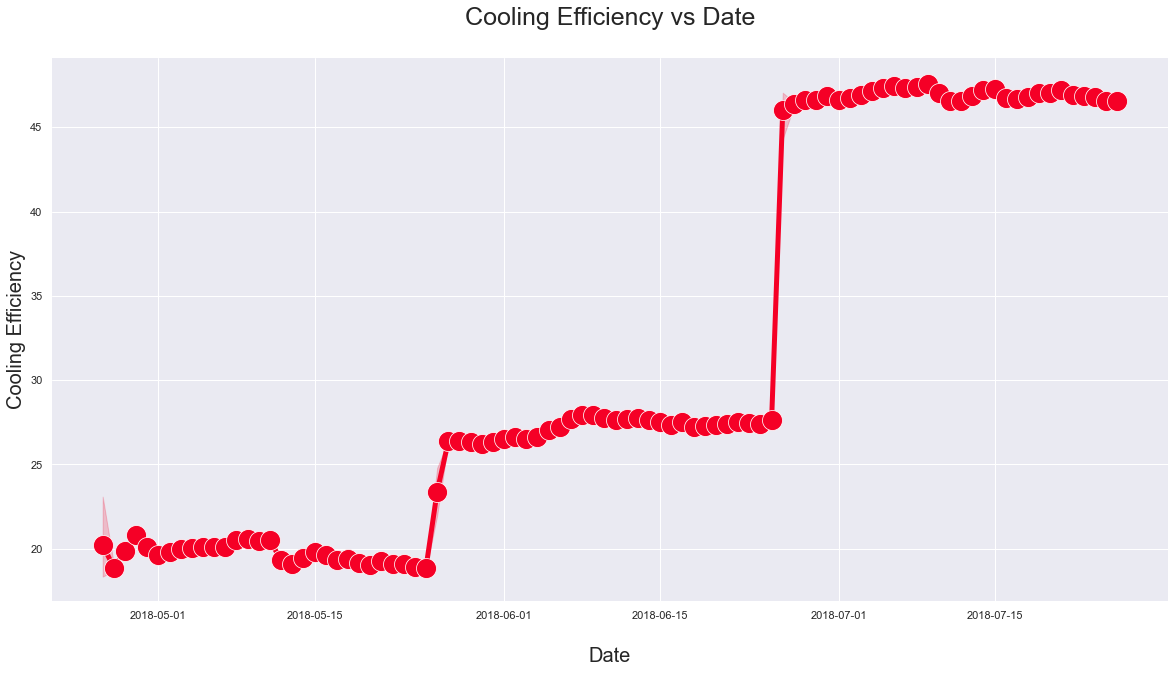

In [12]:
#Plotting Cooling Efficiency and Month/2018

_, axs = plt.subplots(figsize=(20,10))

x = data["Dates"]
y = data["Cooling efficiency"]


sns.lineplot(x,y,data=data.T,ax=axs,color="#F50026",marker="o",linewidth=5,markersize=20)



axs.set_title("Cooling Efficiency vs Date\n",fontsize=25)
axs.set_xlabel("\nDate",fontsize=20)
axs.set_ylabel("Cooling Efficiency",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

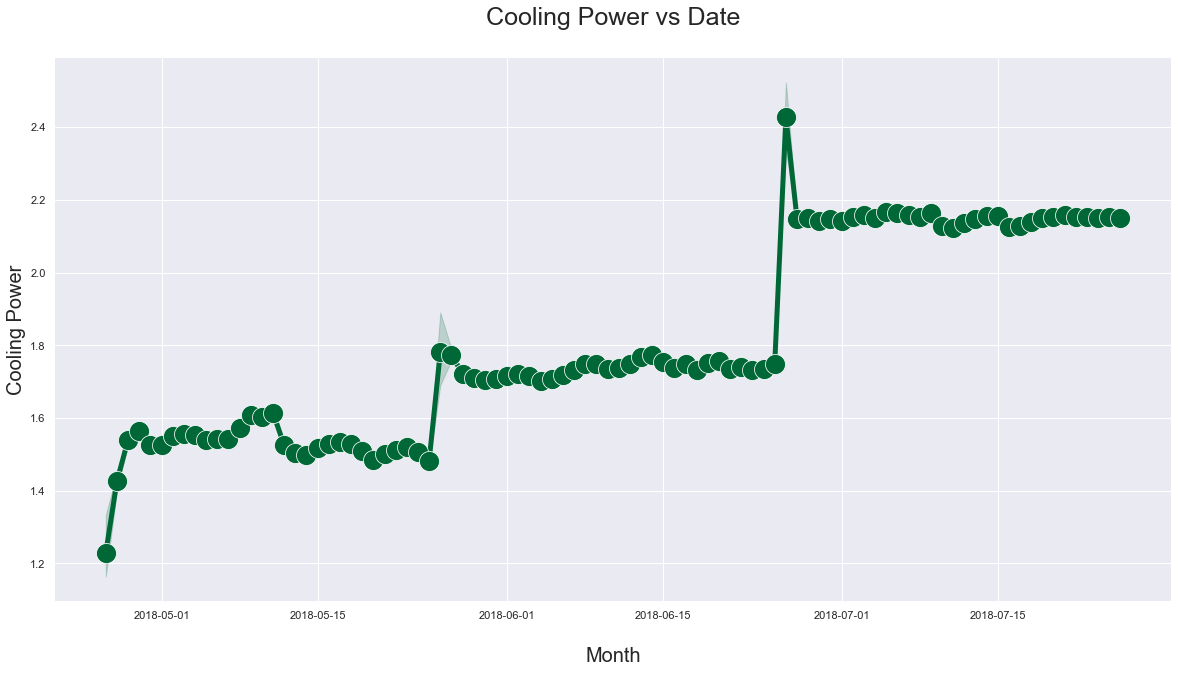

In [13]:
#Plotting Cooling Power and Month/2018

_, axs = plt.subplots(figsize=(20,10))

x = data["Dates"]
y = data["Cooling power"]


sns.lineplot(x,y,data=data.T,ax=axs,color="#006837",marker="o",linewidth=5,markersize=20)



axs.set_title("Cooling Power vs Date\n",fontsize=25)
axs.set_xlabel("\nMonth",fontsize=20)
axs.set_ylabel("Cooling Power",fontsize=20)
#axs.legend(["World Pop Total"],title="Continent", edgecolor = "#1c1c1c")
# axs.set_xticks([],minor=False)

sns.despine(left=True, bottom=True)
plt.show()

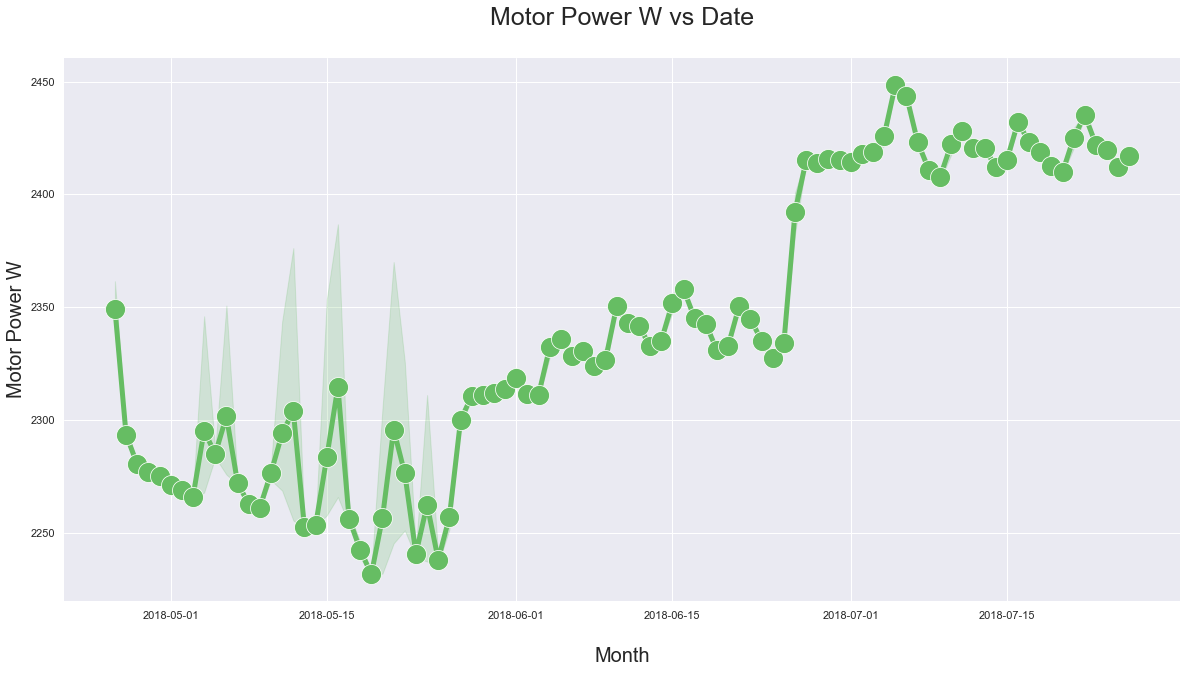

In [14]:
#Plotting Motor Power W and Month/2018

_, axs = plt.subplots(figsize=(20,10))

x = data["Dates"]
y = data["Motor power W"]


sns.lineplot(x,y,data=data.T,ax=axs,color="#66BD63",marker="o",linewidth=5,markersize=20)



axs.set_title("Motor Power W vs Date\n",fontsize=25)
axs.set_xlabel("\nMonth",fontsize=20)
axs.set_ylabel("Motor Power W",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

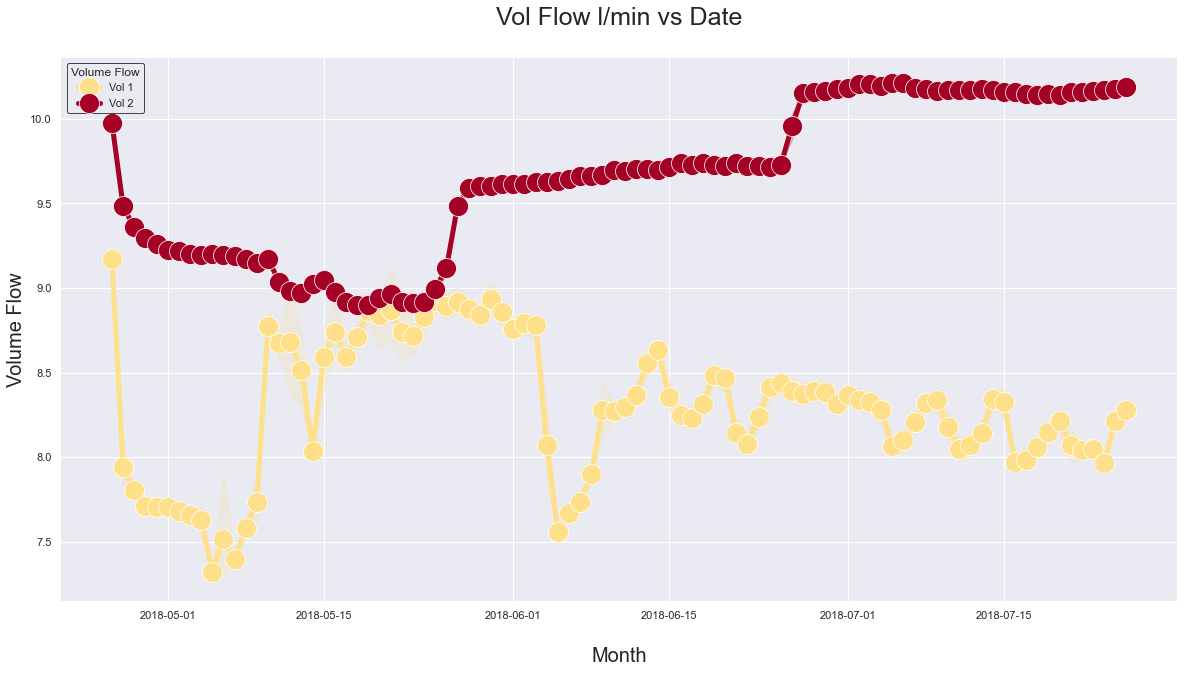

In [15]:
#Plotting Volume 1 and Month/2018

_, axs = plt.subplots(figsize=(20,10))

x = data["Dates"]
y1 = data["Vol_1"]
y2 = data["Vol_2"]


sns.lineplot(x,y1,data=data.T,ax=axs,color="#FEE08B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x,y2,data=data.T,ax=axs,color="#A50026",marker="o",linewidth=5,markersize=20)


axs.set_title("Vol Flow l/min vs Date\n",fontsize=25)
axs.set_xlabel("\nMonth",fontsize=20)
axs.set_ylabel("Volume Flow",fontsize=20)

axs.legend(["Vol 1","Vol 2"],title="Volume Flow", edgecolor = "#1c1c1c")

sns.despine(left=True, bottom=True)
plt.show()

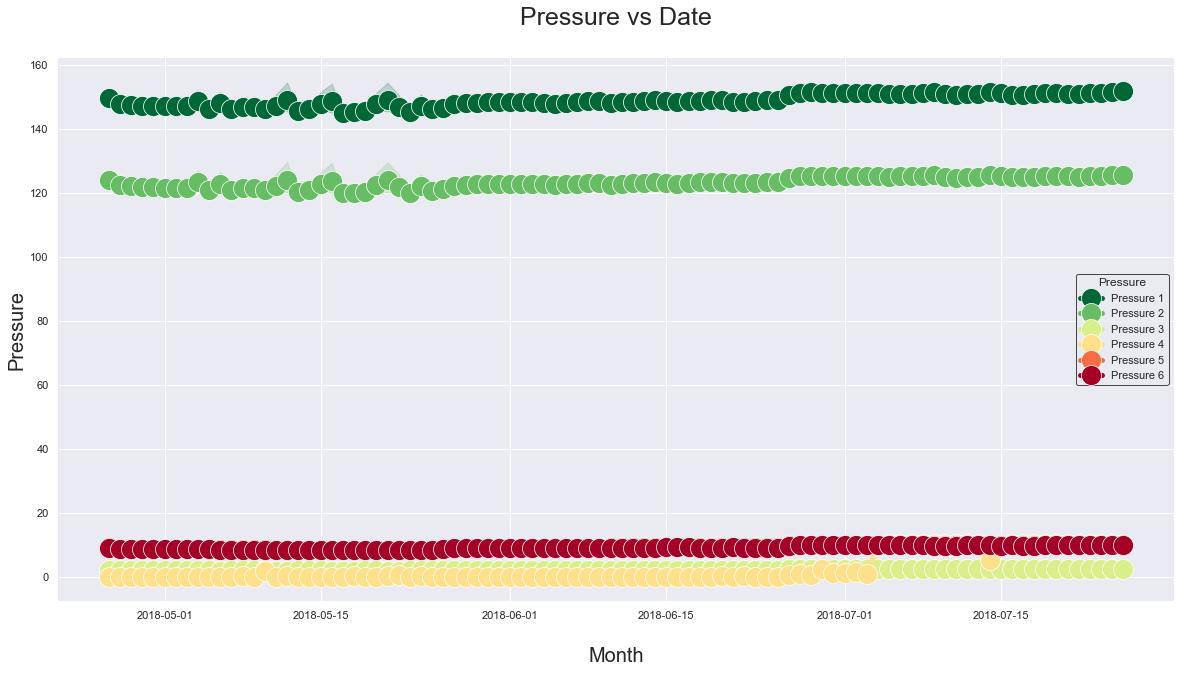

In [18]:
#Plotting Pressure bar 1-6 and Month/2018

_, axs = plt.subplots(figsize=(20,10))

x = data["Dates"]
y1 = data["Pressure bar 1"]
y2 = data["Pressure bar 2"]
y3 = data["Pressure bar 3"]
y4 = data["Pressure bar 4"]
y5 = data["Pressure bar 5"]
y6 = data["Pressure bar 6"]

sns.lineplot(x,y1,data=data.T,ax=axs,color="#006837",marker="o",linewidth=5,markersize=20)
sns.lineplot(x,y2,data=data.T,ax=axs,color="#66BD63",marker="o",linewidth=5,markersize=20)
sns.lineplot(x,y3,data=data.T,ax=axs,color="#D9EF8B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x,y4,data=data.T,ax=axs,color="#FEE08B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x,y5,data=data.T,ax=axs,color="#F46D43",marker="o",linewidth=5,markersize=20)
sns.lineplot(x,y6,data=data.T,ax=axs,color="#A50026",marker="o",linewidth=5,markersize=20)

axs.set_title("Pressure vs Date\n",fontsize=25)
axs.set_xlabel("\nMonth",fontsize=20)
axs.set_ylabel("Pressure",fontsize=20)

axs.legend(["Pressure 1","Pressure 2", "Pressure 3", "Pressure 4", "Pressure 5", "Pressure 6"],title="Pressure", edgecolor = "#1c1c1c")

sns.despine(left=True, bottom=True)
plt.show()

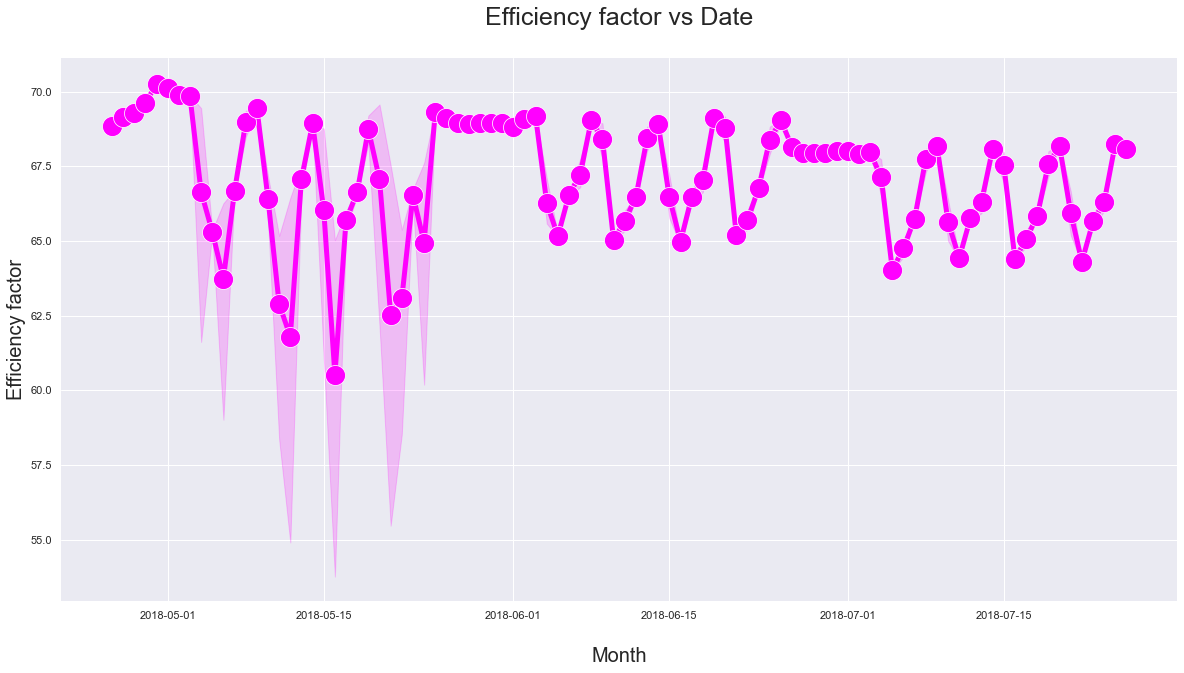

In [19]:
#Plotting Efficiency Factor and Month/2018

_, axs = plt.subplots(figsize=(20,10))

x = data["Dates"]
y = data["Efficiency factor"]


sns.lineplot(x,y,data=data.T,ax=axs,color='magenta',marker="o",linewidth=5,markersize=20)



axs.set_title("Efficiency factor vs Date\n",fontsize=25)
axs.set_xlabel("\nMonth",fontsize=20)
axs.set_ylabel("Efficiency factor",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

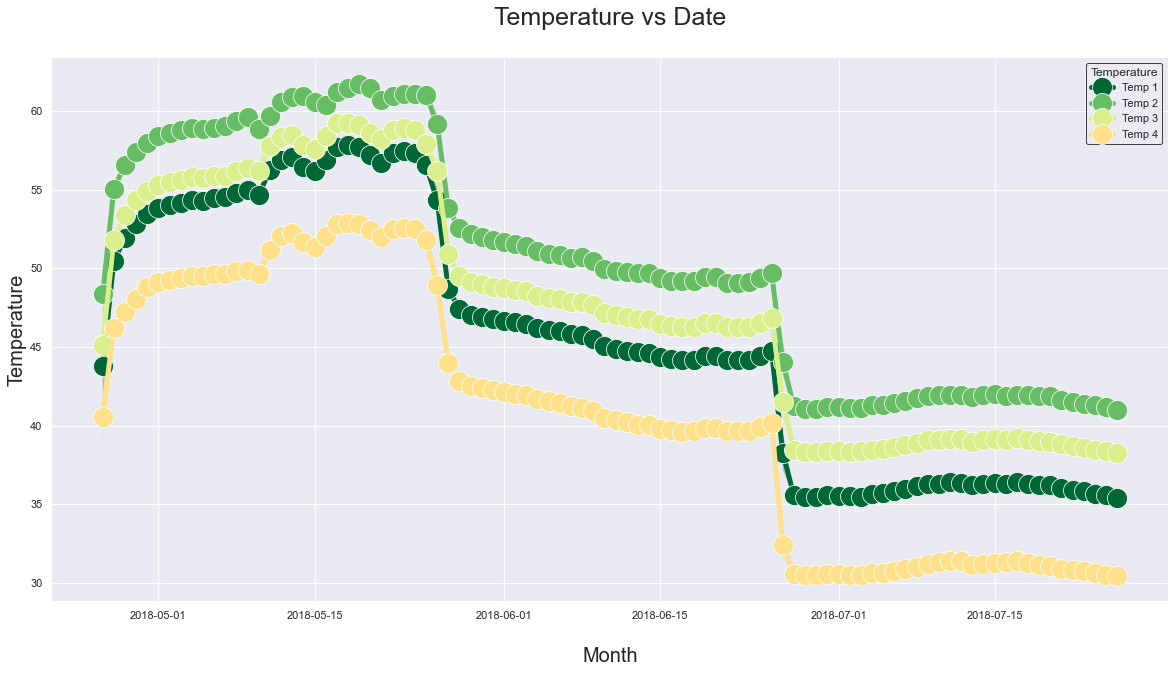

In [20]:
#Plotting Temperature 1-4 and Month/2018

_, axs = plt.subplots(figsize=(20,10))

x = data["Dates"]
y1 = data["Temp_1"]
y2 = data["Temp_2"]
y3 = data["Temp_3"]
y4 = data["Temp_4"]

sns.lineplot(x,y1,data=data.T,ax=axs,color="#006837",marker="o",linewidth=5,markersize=20)
sns.lineplot(x,y2,data=data.T,ax=axs,color="#66BD63",marker="o",linewidth=5,markersize=20)
sns.lineplot(x,y3,data=data.T,ax=axs,color="#D9EF8B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x,y4,data=data.T,ax=axs,color="#FEE08B",marker="o",linewidth=5,markersize=20)

axs.set_title("Temperature vs Date\n",fontsize=25)
axs.set_xlabel("\nMonth",fontsize=20)
axs.set_ylabel("Temperature",fontsize=20)

axs.legend(["Temp 1","Temp 2", "Temp 3", "Temp 4"],title="Temperature", edgecolor = "#1c1c1c")

sns.despine(left=True, bottom=True)
plt.show()

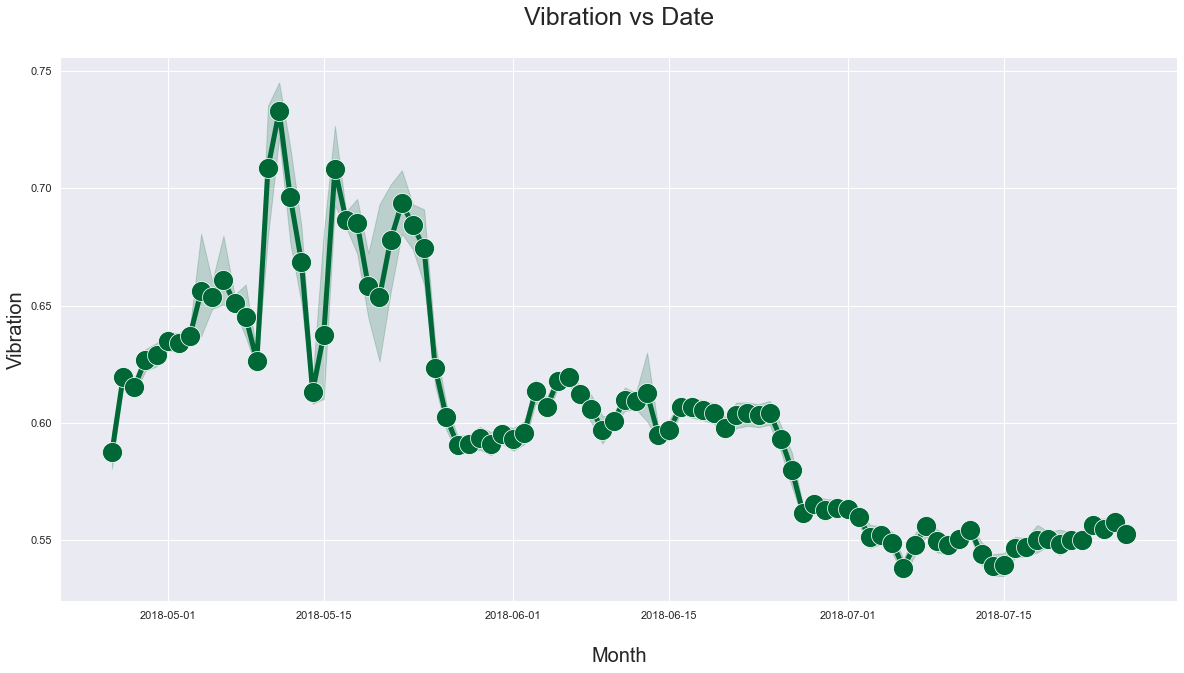

In [21]:
#Plotting Vibration and Month/2018

_, axs = plt.subplots(figsize=(20,10))

x = data["Dates"]
y = data["Vibration"]

sns.lineplot(x,y,data=data.T,ax=axs,color="#006837",marker="o",linewidth=5,markersize=20)

axs.set_title("Vibration vs Date\n",fontsize=25)
axs.set_xlabel("\nMonth",fontsize=20)
axs.set_ylabel("Vibration",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

In [112]:
#Outliers study

#create a function to find outliers using IQR

def find_outliers_IQR(data):
   
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    IQR = q3-q1

    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]

    return outliers

In [113]:
outliers = find_outliers_IQR(data["Vibration"])

print("Number of outliers: "+ str(len(outliers)))

print("Max outlier value: "+ str(outliers.max()))

print("Min outlier value: "+ str(outliers.min()))

outliers

Number of outliers: 52
Max outlier value: 1.037
Min outlier value: 0.721


212     0.884
213     0.748
248     0.866
291     0.791
344     0.761
347     0.770
348     0.792
349     0.800
350     0.784
352     0.767
353     0.787
354     0.788
355     0.779
356     0.771
357     0.728
358     0.741
359     0.759
360     0.744
361     0.738
362     0.759
363     0.738
364     0.723
365     0.734
367     0.751
368     0.759
370     0.746
371     0.827
372     0.741
373     0.738
374     0.737
375     0.743
376     0.735
378     0.725
382     0.726
385     0.730
389     0.842
396     0.801
464     1.037
479     0.721
481     0.721
483     0.735
484     0.849
485     0.730
500     0.823
588     0.859
592     0.956
617     0.850
618     0.735
622     0.801
634     0.818
673     0.801
1155    0.787
Name: Vibration, dtype: float64

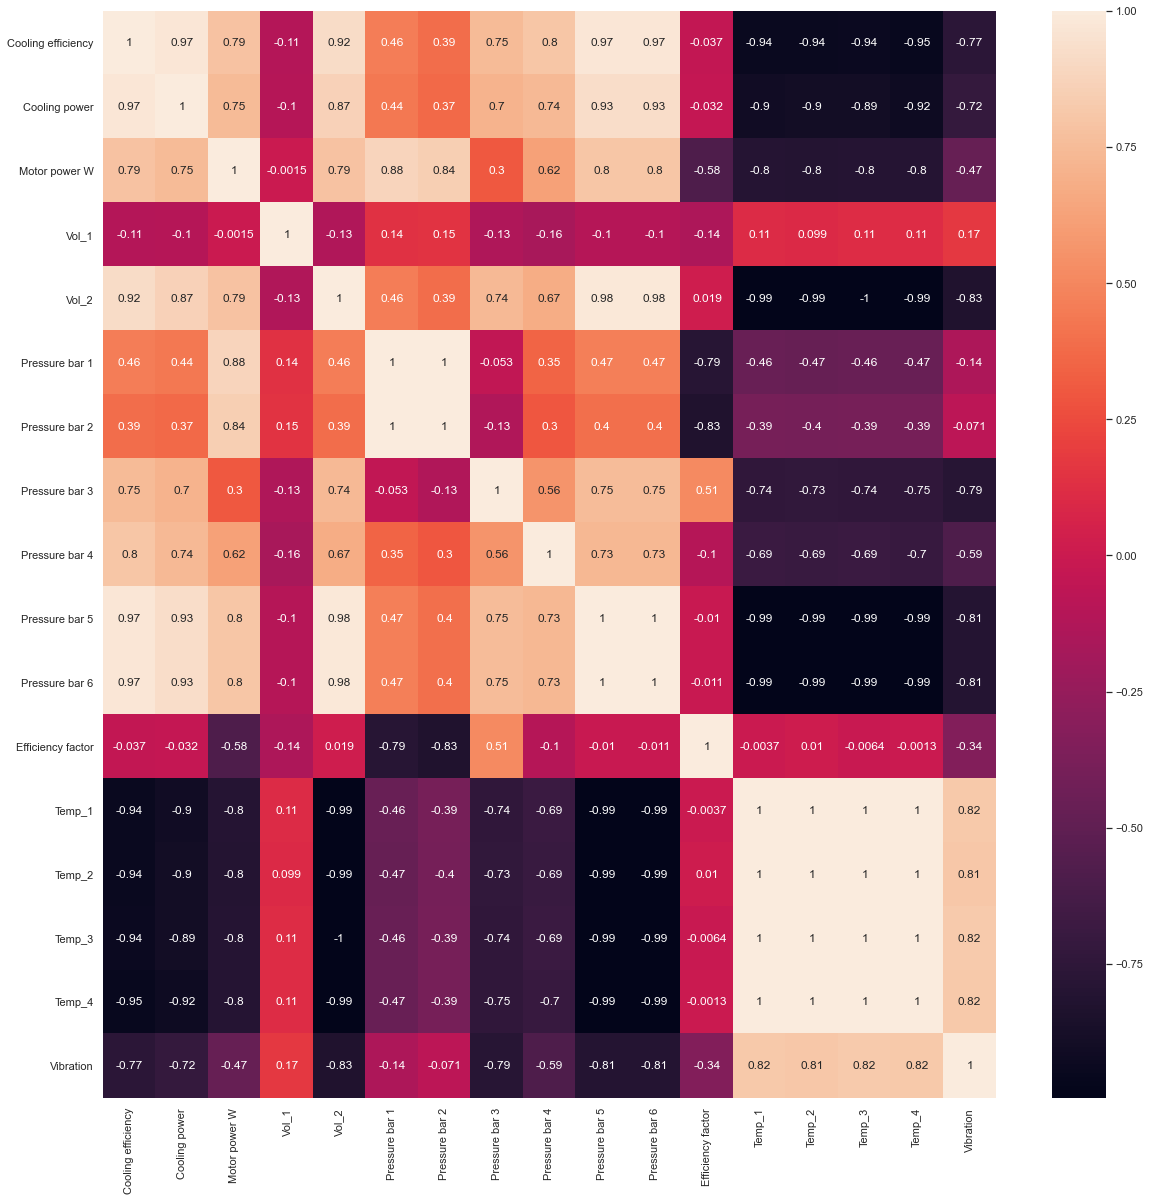

In [16]:
#Building a correlation matrix

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

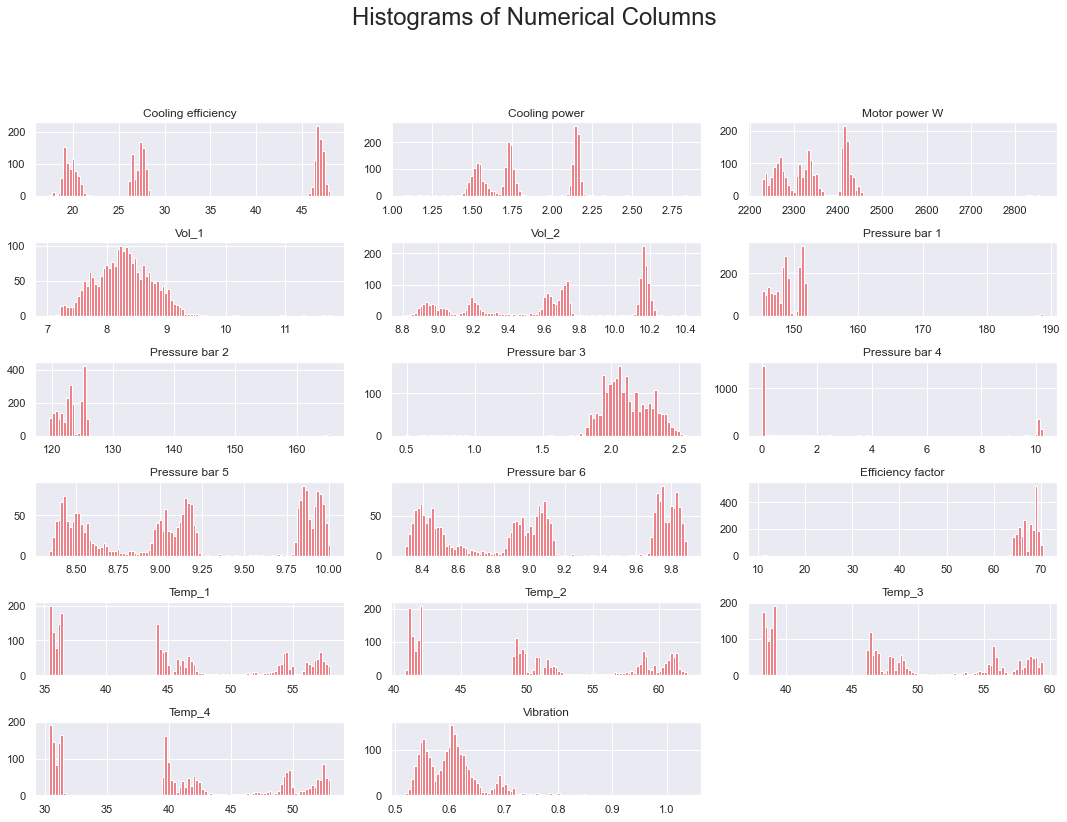

In [17]:
#Histogram for numerical columns
dataset = data[["Cooling efficiency", "Cooling power", "Motor power W", "Vol_1", "Vol_2", "Pressure bar 1", "Pressure bar 2", "Pressure bar 3", "Pressure bar 4", "Pressure bar 5", "Pressure bar 6", "Efficiency factor", "Temp_1", "Temp_2", "Temp_3", "Temp_4", "Vibration"]]

fig = plt.figure(figsize=(15, 12))

plt.suptitle('Histograms of Numerical Columns\n', horizontalalignment="center", fontstyle="normal", 
             fontsize=24, fontfamily="sans-serif")

for i in range(dataset.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset.columns.values[i])
    vals = np.size(dataset.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(dataset.iloc[:, i], bins=vals, color='#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [18]:
#Normalize all numerical columns (dataset defined above)

scaler = StandardScaler()
standardized = scaler.fit_transform(dataset)

standardized

array([[ 1.37701589,  1.37955664,  0.91699429, ..., -1.2455079 ,
        -1.27655454,  0.01429267],
       [-0.18366813, -1.4469527 ,  0.89083407, ..., -1.19737748,
        -0.87135223, -0.2529482 ],
       [-0.67405978, -2.3830045 ,  0.73648883, ..., -1.12331009,
        -0.69064557, -0.48201179],
       ...,
       [ 1.33841945,  1.24006657,  0.9431545 , ..., -1.26476007,
        -1.27507435, -0.71107539],
       [ 1.32341454,  1.23639578,  0.9431545 , ..., -1.26328942,
        -1.27458095, -1.41735481],
       [ 1.33954698,  1.23272499,  0.97193073, ..., -1.26369051,
        -1.27754133, -1.18829122]])

In [19]:
#Getting the name of the numerical columns

col_names = list(dataset.columns)
col_names = list(dataset)

print(col_names)

['Cooling efficiency', 'Cooling power', 'Motor power W', 'Vol_1', 'Vol_2', 'Pressure bar 1', 'Pressure bar 2', 'Pressure bar 3', 'Pressure bar 4', 'Pressure bar 5', 'Pressure bar 6', 'Efficiency factor', 'Temp_1', 'Temp_2', 'Temp_3', 'Temp_4', 'Vibration']


In [20]:
#Let's work with features that have a high correlation (equal or above +-0.7 but less than 1)

abs_corr_val = 0.7
#max_corr = 1
#step = 0.1

##Creating a "range" function to work with floats
# def range_with_floats(abs_corr_val, max_corr, step):
#     while max_corr > abs_corr_val:
#         yield abs_corr_val
#         abs_corr_val += step
# for i in range_with_floats(0.7, 1, 0.01):
#    print(i)

corr= data[col_names].corr()
    
list_correlations = []
for row in range(corr.shape[0]):    
      list_to_plot=[]   
      mask_list=((corr.iloc[row]>abs_corr_val)|(corr.iloc[row]<-abs_corr_val))* 1  
      for i in range(mask_list.shape[0]):
        if mask_list[i]!=1:
          list_to_plot.append(col_names[i])
      print((col_names[row]+ '  correlation cutoff value = +- '+str(abs_corr_val),list_to_plot))  
      list_correlations.append(list_to_plot)

for i,lc in enumerate(list_correlations):
    print(i,lc)

('Cooling efficiency  correlation cutoff value = +- 0.7', ['Vol_1', 'Pressure bar 1', 'Pressure bar 2', 'Efficiency factor'])
('Cooling power  correlation cutoff value = +- 0.7', ['Vol_1', 'Pressure bar 1', 'Pressure bar 2', 'Efficiency factor'])
('Motor power W  correlation cutoff value = +- 0.7', ['Vol_1', 'Pressure bar 3', 'Pressure bar 4', 'Efficiency factor', 'Vibration'])
('Vol_1  correlation cutoff value = +- 0.7', ['Cooling efficiency', 'Cooling power', 'Motor power W', 'Vol_2', 'Pressure bar 1', 'Pressure bar 2', 'Pressure bar 3', 'Pressure bar 4', 'Pressure bar 5', 'Pressure bar 6', 'Efficiency factor', 'Temp_1', 'Temp_2', 'Temp_3', 'Temp_4', 'Vibration'])
('Vol_2  correlation cutoff value = +- 0.7', ['Vol_1', 'Pressure bar 1', 'Pressure bar 2', 'Pressure bar 4', 'Efficiency factor'])
('Pressure bar 1  correlation cutoff value = +- 0.7', ['Cooling efficiency', 'Cooling power', 'Vol_1', 'Vol_2', 'Pressure bar 3', 'Pressure bar 4', 'Pressure bar 5', 'Pressure bar 6', 'Temp_1', 

In [21]:
# Save the unique pairs with correlation > 0.7
pairs = dict()

for col, features_list in zip(col_names, list_correlations):

    for feature in features_list:
        if col in pairs:
            pairs[col].append(feature)
        else:
            pairs[col] = [feature]
    pairs[col] = sorted(set(pairs[col]))
    print(col, ':\t', pairs[col])


unique = set()
for key in pairs:
    for feature in pairs[key]:
        # create the pair if they are not the same feeatue, since we know that ech feature has a perfect correlation with itself
        if key != feature:
            pair = (key, feature)
            pair = sorted(pair)
            # add to the unique pairs set
            unique.add(tuple(pair))

print('Total unique:', len(unique))

Cooling efficiency :	 ['Efficiency factor', 'Pressure bar 1', 'Pressure bar 2', 'Vol_1']
Cooling power :	 ['Efficiency factor', 'Pressure bar 1', 'Pressure bar 2', 'Vol_1']
Motor power W :	 ['Efficiency factor', 'Pressure bar 3', 'Pressure bar 4', 'Vibration', 'Vol_1']
Vol_1 :	 ['Cooling efficiency', 'Cooling power', 'Efficiency factor', 'Motor power W', 'Pressure bar 1', 'Pressure bar 2', 'Pressure bar 3', 'Pressure bar 4', 'Pressure bar 5', 'Pressure bar 6', 'Temp_1', 'Temp_2', 'Temp_3', 'Temp_4', 'Vibration', 'Vol_2']
Vol_2 :	 ['Efficiency factor', 'Pressure bar 1', 'Pressure bar 2', 'Pressure bar 4', 'Vol_1']
Pressure bar 1 :	 ['Cooling efficiency', 'Cooling power', 'Pressure bar 3', 'Pressure bar 4', 'Pressure bar 5', 'Pressure bar 6', 'Temp_1', 'Temp_2', 'Temp_3', 'Temp_4', 'Vibration', 'Vol_1', 'Vol_2']
Pressure bar 2 :	 ['Cooling efficiency', 'Cooling power', 'Pressure bar 3', 'Pressure bar 4', 'Pressure bar 5', 'Pressure bar 6', 'Temp_1', 'Temp_2', 'Temp_3', 'Temp_4', 'Vibrati

In [22]:
# Dictionary of Column name with associated index
idx_dic = {}
for col in data.columns:
    idx_dic[col] = data.columns.get_loc(col)
print(idx_dic)

{'Cooling efficiency': 0, 'Cooling power': 1, 'Motor power W': 2, 'Vol_1': 3, 'Vol_2': 4, 'Pressure bar 1': 5, 'Pressure bar 2': 6, 'Pressure bar 3': 7, 'Pressure bar 4': 8, 'Pressure bar 5': 9, 'Pressure bar 6': 10, 'Efficiency factor': 11, 'Temp_1': 12, 'Temp_2': 13, 'Temp_3': 14, 'Temp_4': 15, 'Vibration': 16, 'Date': 17, 'Dates': 18, 'Time': 19}


In [23]:
# #Removing Efficiency Factor since it's going to be plotted against (column with index 11)

#df = data.drop(data.columns[[11]],axis = 1)
#df.head()

['Cooling efficiency', 'Cooling power', 'Motor power W', 'Vol_1', 'Vol_2', 'Pressure bar 1', 'Pressure bar 2', 'Pressure bar 3', 'Pressure bar 4', 'Pressure bar 5', 'Pressure bar 6', 'Efficiency factor', 'Temp_1', 'Temp_2', 'Temp_3', 'Temp_4', 'Vibration']


Cooling efficiency Correlations > +- 0.7


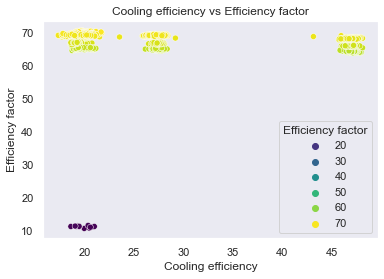

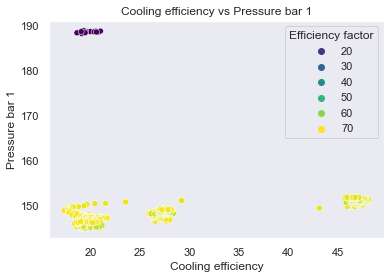

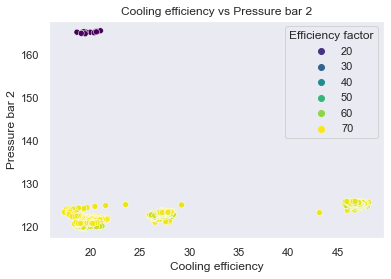

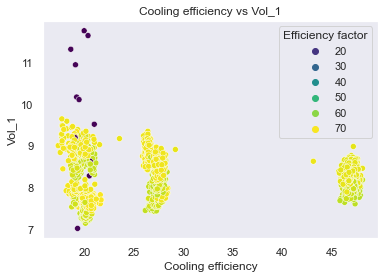

In [24]:
# Scatter Plot of features with high correlation 

# for col in col_names:
#     for i,features_list in enumerate(list_correlations):
#         for feature in features_list:
#             if col != feature:
#                 sns.scatterplot(data=data, x= col, y= feature, hue= 'Efficiency factor', palette= 'viridis')
#                 plt.title(col + ' vs ' + feature)
#                 plt.show()
                
                
# drop 'Efficiency factor' from list since it will be the hue in the plot
columns = col_names.copy()
print(columns)
columns.remove('Efficiency factor')
#print(len(columns), columns)

# Plot graphs for each col separately
col = columns[0]
print('\n\n'+ col + ' Correlations > +- ' + str(abs_corr_val))
#print(pairs[col])
                
#for pair in unique_pairs:
for pair in unique:
    if pair[0] == col:
        sns.scatterplot(data=data, x= pair[0], y= pair[1], hue= 'Efficiency factor', palette= 'viridis')
        plt.title(pair[0] + ' vs ' + pair[1])
        plt.grid() 
        plt.show()

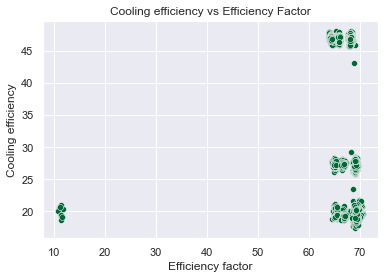

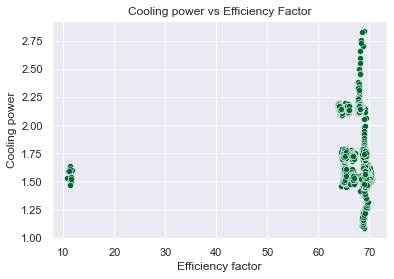

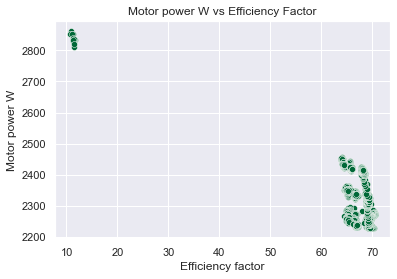

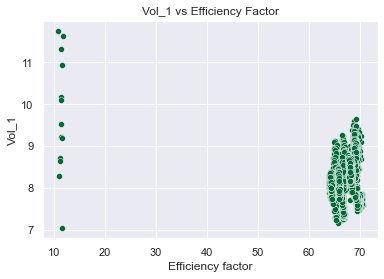

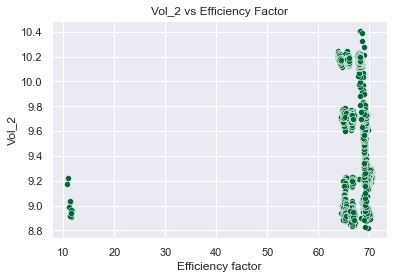

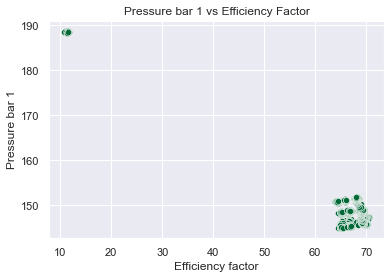

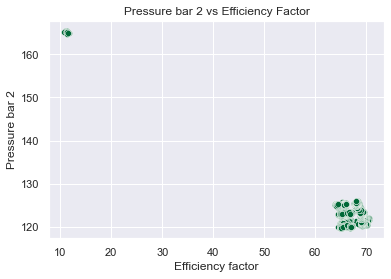

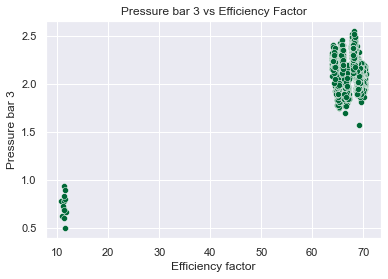

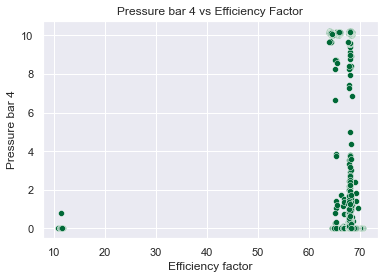

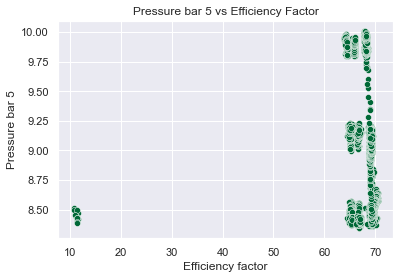

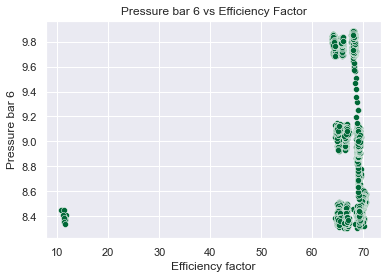

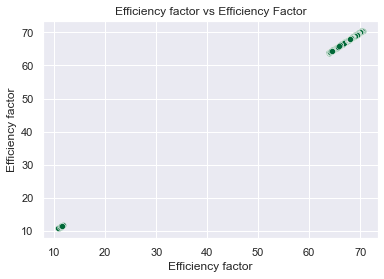

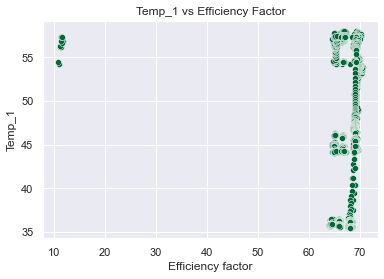

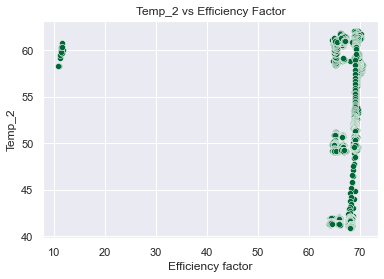

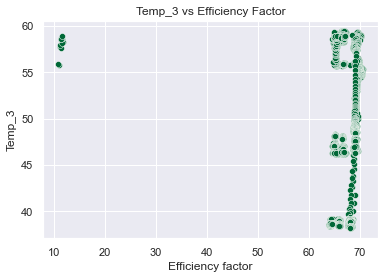

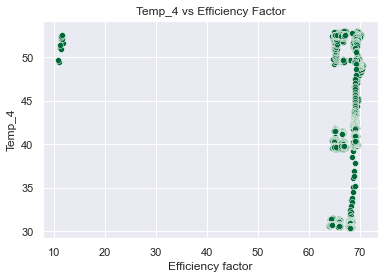

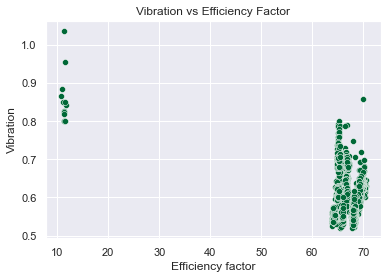

In [25]:
#Creating plots for Efficiency Factor vs all other features

for col in col_names:
    sns.scatterplot(data=data, x= 'Efficiency factor', y= col, color="#006837")
    plt.title(col + ' vs Efficiency Factor')
    plt.show()

In [ ]:
# # #EFFICIENCY FACTOR & PRESSURE 1-6

# #Size of the plot
# fig = plt.figure(figsize=(15, 15))

# # Needed to add spacing between 1st and 2nd row
# # Add a margin between the main title and sub-plots
# fig.subplots_adjust(hspace=0.4, top=0.85)

# # Add the main title
# fig.suptitle("Pressure bar 1-6 vs Efficiency Factor", fontsize=20, fontweight ="bold")

# # Add the subplots
# ax1 = fig.add_subplot(3,3,1)
# ax2 = fig.add_subplot(3,3,2)
# ax3 = fig.add_subplot(3,3,3)
# ax4 = fig.add_subplot(3,3,4)
# ax5 = fig.add_subplot(3,3,5)
# ax6 = fig.add_subplot(3,3,6)

# x = data['Efficiency factor']
# y = data['Pressure bar 1']
# y1 = data['Pressure bar 2']
# y2 = data['Pressure bar 3']
# y3 = data['Pressure bar 4']
# y4 = data['Pressure bar 5']
# y5 = data['Pressure bar 6']

# ax1.plot(x, y)
# ax2.plot(x, y1)
# ax3.plot(x, y2)
# ax4.plot(x, y3)
# ax5.plot(x, y4)
# ax6.plot(x, y5)

# # Add the text for each subplot
# ax1.set_title('Pressure bar 1', fontsize=15, fontweight ="bold")
# ax2.set_title("Pressure bar 2", fontsize=15, fontweight ="bold")
# ax3.set_title("Pressure bar 3", fontsize=15, fontweight ="bold")
# ax4.set_title("Pressure bar 4", fontsize=15, fontweight ="bold")
# ax5.set_title("Pressure bar 5", fontsize=15, fontweight ="bold")
# ax6.set_title("Pressure bar 6", fontsize=15, fontweight ="bold")

# plt.show()

In [ ]:
# #MOTOR POWER W AND TEMPERATURE 1-4

# #Size of the plot
# fig = plt.figure(figsize=(15, 15))

# # Needed to add spacing between 1st and 2nd row
# # Add a margin between the main title and sub-plots
# fig.subplots_adjust(hspace=0.4, top=0.85)

# # Add the main title
# fig.suptitle("Temperature 1-4 vs Motor Power W", fontsize=20)

# # Add the subplots
# ax1 = fig.add_subplot(2,2,1)
# ax2 = fig.add_subplot(2,2,2)
# ax3 = fig.add_subplot(2,2,3)
# ax4 = fig.add_subplot(2,2,4)

# x = dataset['Motor power W']
# y = dataset['Temp_1']
# y1 = dataset['Temp_2']
# y2 = dataset['Temp_3']
# y3 = dataset['Temp_4']

# ax1.scatterplot(x, y)
# ax2.scatterplot(x, y1)
# ax3.scatterplot(x, y2)
# ax4.scatterplot(x, y3)

# # Add the text for each subplot
# ax1.set_title('Temp 1', fontsize=15, fontweight ="bold")
# ax2.set_title("Temp 2", fontsize=15, fontweight ="bold")
# ax3.set_title("Temp 3", fontsize=15, fontweight ="bold")
# ax4.set_title("Temp 4", fontsize=15, fontweight ="bold")

# plt.show()

In [ ]:
# #COOLING EFF AND MOTOR POWER W

# _, axs = plt.subplots(figsize=(20,10))

# x = data["Cooling efficiency"]
# y = data["Motor power W"]

# sns.scatterplot(x,y,data=data.T,ax=axs,color="#006837",linewidth=5)

# axs.set_title("Motor Power W vs Cooling Eff\n",fontsize=25)
# axs.set_xlabel("\nCooling Eff",fontsize=20)
# axs.set_ylabel("Motor Power W",fontsize=20)

# sns.despine(left=True, bottom=True)
# plt.show()

In [ ]:
# #COOLING EFF AND COOLING POWER

# _, axs = plt.subplots(figsize=(20,10))

# y = data["Cooling power"]
# x = data["Cooling efficiency"]

# sns.scatterplot(x,y,data=data.T,ax=axs,linewidth=5, palette= 'viridis')

# axs.set_title("Cooling efficiency vs Cooling power\n",fontsize=25)
# axs.set_ylabel("\nCooling Power",fontsize=20)
# axs.set_xlabel("Cooling efficiency",fontsize=20)

# sns.despine(left=True, bottom=True)
# plt.show()

In [26]:
#Importing the second datasets

data2 = pd.read_csv('profile.csv')
data2.head()

,Cooler condition,Valve condition,Internal pump leakage,Hydraulic accumulator,stable flag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1


In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Cooler condition       2205 non-null   int64
 1   Valve condition        2205 non-null   int64
 2   Internal pump leakage  2205 non-null   int64
 3   Hydraulic accumulator  2205 non-null   int64
 4   stable flag            2205 non-null   int64
dtypes: int64(5)
memory usage: 86.3 KB


In [28]:
#Combining them both in just one

data2['Cooler condition'] = data2['Cooler condition'].astype(float)
data2['Valve condition'] = data2['Valve condition'].astype(float)
data2['Internal pump leakage'] = data2['Internal pump leakage'].astype(float)
data2['Hydraulic accumulator'] = data2['Hydraulic accumulator'].astype(float)
data2['stable flag'] = data2['stable flag'].astype(float)

data['Cooler condition'] = data2['Cooler condition']
data['Valve condition'] = data2['Valve condition']
data['Internal pump leakage'] = data2['Internal pump leakage']
data['Hydraulic accumulator'] = data2['Hydraulic accumulator']
data['stable flag'] = data2['stable flag']


In [29]:
#Checking the type of data we have here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cooling efficiency     2205 non-null   float64
 1   Cooling power          2205 non-null   float64
 2   Motor power W          2205 non-null   float64
 3   Vol_1                  2205 non-null   float64
 4   Vol_2                  2205 non-null   float64
 5   Pressure bar 1         2205 non-null   float64
 6   Pressure bar 2         2205 non-null   float64
 7   Pressure bar 3         2205 non-null   float64
 8   Pressure bar 4         2205 non-null   float64
 9   Pressure bar 5         2205 non-null   float64
 10  Pressure bar 6         2205 non-null   float64
 11  Efficiency factor      2205 non-null   float64
 12  Temp_1                 2205 non-null   float64
 13  Temp_2                 2205 non-null   float64
 14  Temp_3                 2205 non-null   float64
 15  Temp

In [30]:
#New dataset (two combined datasets)

data.head()

,Cooling efficiency,Cooling power,Motor power W,Vol_1,Vol_2,Pressure bar 1,Pressure bar 2,Pressure bar 3,Pressure bar 4,Pressure bar 5,...,Temp_4,Vibration,Date,Dates,Time,Cooler condition,Valve condition,Internal pump leakage,Hydraulic accumulator,stable flag
0,47.202,2.184,2411.6,8.990,10.179,151.47,125.50,2.305,0.0,9.936,...,30.363,0.604,4/26/18 0:00,2018-04-26,00:00:00,3.0,100.0,0.0,130.0,1.0
1,29.208,1.414,2409.6,8.919,10.408,151.11,125.06,2.281,0.0,9.700,...,33.648,0.590,4/26/18 1:00,2018-04-26,01:00:00,3.0,100.0,0.0,130.0,1.0
2,23.554,1.159,2397.8,9.179,10.392,150.81,125.13,2.227,0.0,9.606,...,35.113,0.578,4/26/18 2:00,2018-04-26,02:00:00,3.0,100.0,0.0,130.0,1.0
3,21.540,1.101,2383.8,9.034,10.329,150.48,124.93,2.320,0.0,9.528,...,36.133,0.565,4/26/18 3:00,2018-04-26,03:00:00,3.0,100.0,0.0,130.0,1.0
4,20.460,1.086,2372.0,8.729,10.276,150.41,124.72,2.250,0.0,9.408,...,36.992,0.570,4/26/18 4:00,2018-04-26,04:00:00,3.0,100.0,0.0,130.0,1.0


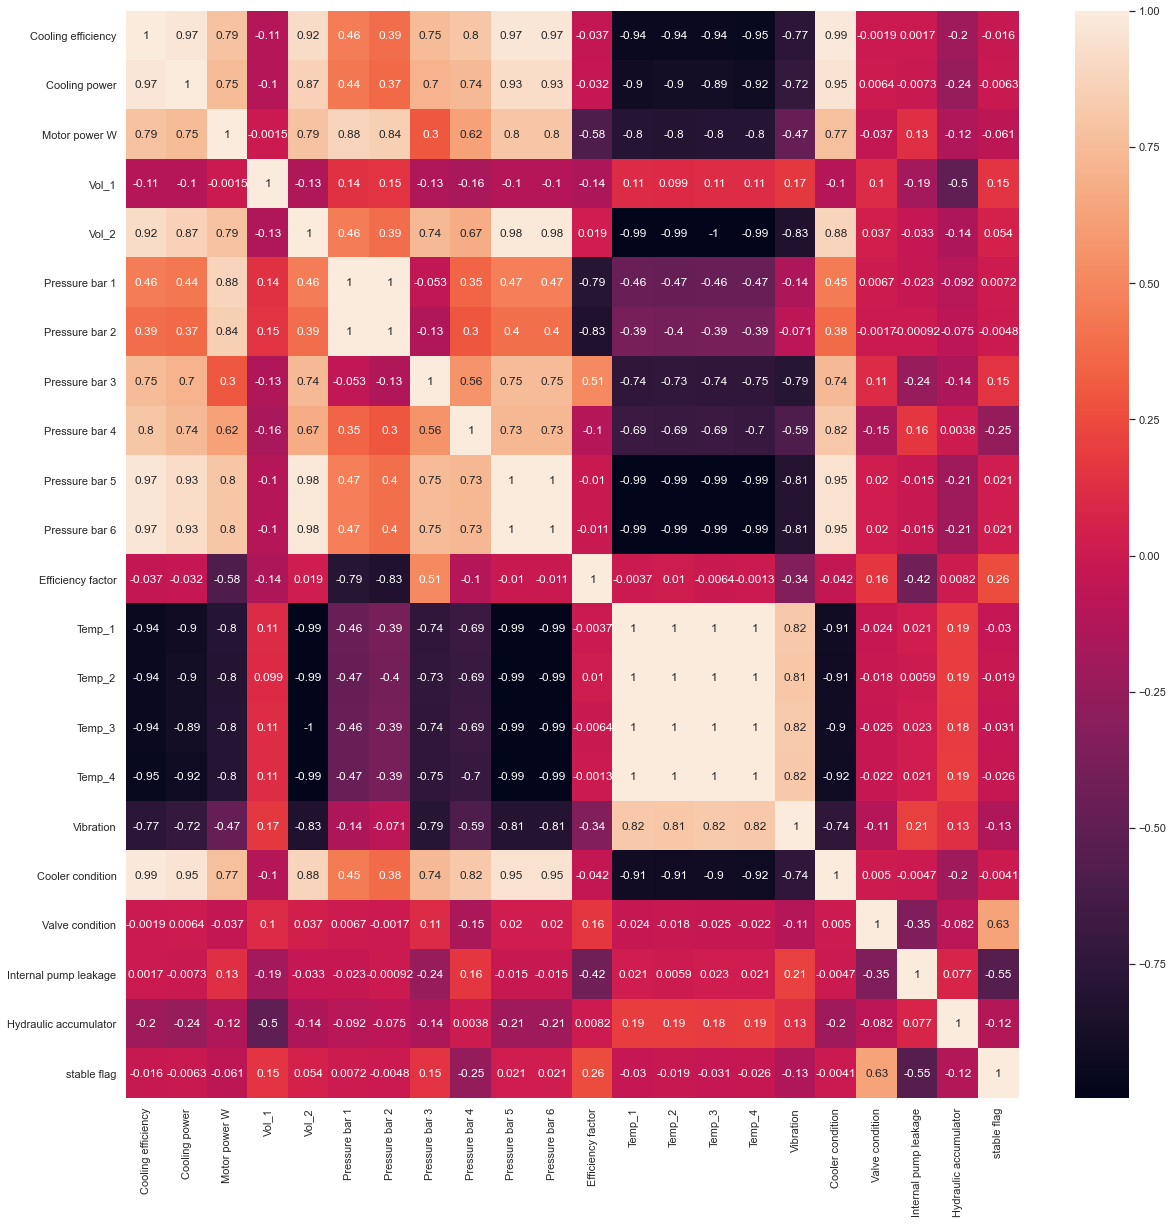

In [31]:
#Building a correlation matrix

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [64]:
#Dataset that I am going to work with in Tableau

data.to_excel("/Users/bia/Documents/Data Project Club/HourlyData_python.xls",sheet_name='Oil Rig',startrow=1, startcol=1)